In [1]:
import numpy as np
from chainconsumer import ChainConsumer, Chain, Truth, PlotConfig
from chainconsumer.statistics import SummaryStatistic
from chainconsumer.chain import ChainConfig
import matplotlib.pyplot as plt
from pandas import DataFrame
import emcee
import copy
import pickle

In [2]:
POSTERIOR_DIR = "../data/posteriors/"
FIGURES_DIR = "../figures/forecasts/"

In [3]:
# # load forecast samples pickled object
# with open('../data/samples/forecast_samples_w0waCDM.pkl', 'rb') as f:
#     forecast_samples = pickle.load(f)

# # remove the suffix 'tab:' from the color names
# for sample_key in forecast_samples.keys():
#     if 'color' in forecast_samples[sample_key]:
#         forecast_samples[sample_key]['color'] = forecast_samples[sample_key]['color'].replace('tab:', '')

# forecast_samples['lsst_4most_spec-z_sigma_v']['color'] = 'purple'
# # forecast_samples['joint_PDSPL_only']['color'] = 'orange'

# # don't use joint_PDSPL_only for now
# forecast_samples.pop('joint_PDSPL_only', None);

In [3]:
forecast_samples = {
    "DSPL": {
        "name": "DSPL (87 lenses)",
        "color": "blue",
        "wCDM": {}, # store emcee backend and samples here
        "w0waCDM":{},
    },
    "lsst_y10": {
        "name": "PDSPL (LSST Y10)",
        "color": "green",
        "wCDM": {},
        "w0waCDM":{},
        "num_pairs": 106198,
    },
    "lsst_4most_spec-z": {
        "name": "PDSPL (4MOST $z^{\\rm spec}$)",
        "color": "red",
        "wCDM": {},
        "w0waCDM":{},
        "num_pairs": 3684,
    },
    "lsst_4most_spec-z_sigma_v": {
        "name": "PDSPL (4MOST $z^{\\rm spec}$ + $\\sigma_{v, D}$)",
        "color": "purple",
        "wCDM": {},
        "w0waCDM":{},
        "num_pairs": 1789,
    },
    "joint_PDSPL_only": {
        "name": "Joint PDSPL",
        "color": "orange",
        "wCDM": {},
        "w0waCDM":{},
    },
    "joint_PDSPL_DSPL": {
        "name": "Joint DSPL + PDSPL",
        "color": "yellow",
        "wCDM": {},
        "w0waCDM":{},
    },
}

plotting_order_keys = [
    "DSPL",
    "lsst_4most_spec-z",
    "lsst_4most_spec-z_sigma_v",
    "lsst_y10",
    "joint_PDSPL_only",
    "joint_PDSPL_DSPL",
]

## Figures for $w_0w_a$-CDM cosmology forecast 

In [4]:
# load posterior samples
columns=[
            '$\\Omega_{\\rm m}$',
            '$w_0$',
            '$w_{\\rm a}$',
            '$\\overline{\\lambda}_{\\rm MST}$',
            '$\\overline{\\gamma}_{\\rm pl}$',
            # '$\\sigma(\\gamma_{\\rm pl, global})$'
            ]


for key in forecast_samples.keys():

    ### Chain without prior
    forecast_samples[key]["w0waCDM"]["emcee_backend"] = emcee.backends.HDFBackend(
        POSTERIOR_DIR + f"{key}_w0waCDM.h5", read_only=True
    )
    samples = forecast_samples[key]["w0waCDM"]["emcee_backend"].get_chain(flat = True,
                                                                  discard=500,
                                                                  thin=100)
    forecast_samples[key]["emcee_samples"] = samples

    df = DataFrame(samples, columns=columns)
    forecast_samples[key]["w0waCDM"]["chainconsumer_chain"] = Chain(
        samples=df, name=forecast_samples[key]["name"], 
        color=forecast_samples[key]["color"],
        kde=1, 
        shade=True,
        shade_alpha=1.0,
        linewidth=2,
    )

    ### Chain with Om prior of mean = 0.3, std = 0.05
    forecast_samples[key]["w0waCDM"]["emcee_backend_om_prior"] = emcee.backends.HDFBackend(
        POSTERIOR_DIR + f"{key}_w0waCDM_om_prior.h5", read_only=True
    )
    samples = forecast_samples[key]["w0waCDM"]["emcee_backend_om_prior"].get_chain(flat = True,
                                                                  discard=500,
                                                                  thin=100)
    forecast_samples[key]["emcee_samples"] = samples

    df = DataFrame(samples, columns=columns)
    forecast_samples[key]['w0waCDM']['chainconsumer_chain_with_prior'] = Chain(
        samples=df, name=forecast_samples[key]["name"]+" + $\\Omega_{\\rm m}$ prior", 
        color=forecast_samples[key]["color"],
        kde=1, 
        shade=True,
        shade_alpha=1.0,
        linewidth=2,
    )

Font 'default' does not have a glyph for '\n' [U+a], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\n' [U+a], substituting with a dummy symbol.


\begin{table}
    \centering
    \caption{}
    \label{tab:model_params}
    \begin{tabular}{cccccc}
        \hline
		Model & $\Omega_{\rm m}$ & $w_0$ & $w_{\rm a}$ & $\overline{\lambda}_{\rm MST}$ & $\overline{\gamma}_{\rm pl}$ \\ 
		\hline
		DSPL (87 lenses) & $0.45^{+0.35}_{-0.24}$ & $-0.71^{+0.49}_{-0.69}$ & $0.7^{+1.2}_{-2.5}$ & $0.954^{+0.148}_{-0.091}$ & $2.13^{+0.14}_{-0.20}$ \\ 
		PDSPL (4MOST $z^{\rm spec}$)
   3684 pairs & $0.45^{+0.38}_{-0.26}$ & $-1.04^{+0.66}_{-0.54}$ & $1.0^{+1.2}_{-2.5}$ & $1.062^{+0.086}_{-0.088}$ & $2.00^{+0.13}_{-0.12}$ \\ 
		PDSPL (4MOST $z^{\rm spec}$ + $\sigma_{v, D}$)
   1789 pairs & $0.28^{+0.16}_{-0.18}$ & $-0.75^{+0.53}_{-0.48}$ & $-1.7^{+2.5}_{-1.1}$ & $0.975^{+0.074}_{-0.057}$ & $2.11^{+0.11}_{-0.12}$ \\ 
		PDSPL (LSST Y10)
   106198 pairs & $0.49^{+0.13}_{-0.17}$ & $-0.84^{+0.31}_{-0.25}$ & $-0.14^{+0.96}_{-2.04}$ & $0.989^{+0.017}_{-0.016}$ & $2.112^{+0.029}_{-0.030}$ \\ 
		Joint PDSPL & $0.41^{+0.12}_{-0.16}$ & $-0.88^{+0.23}_{-0.16}$ & $

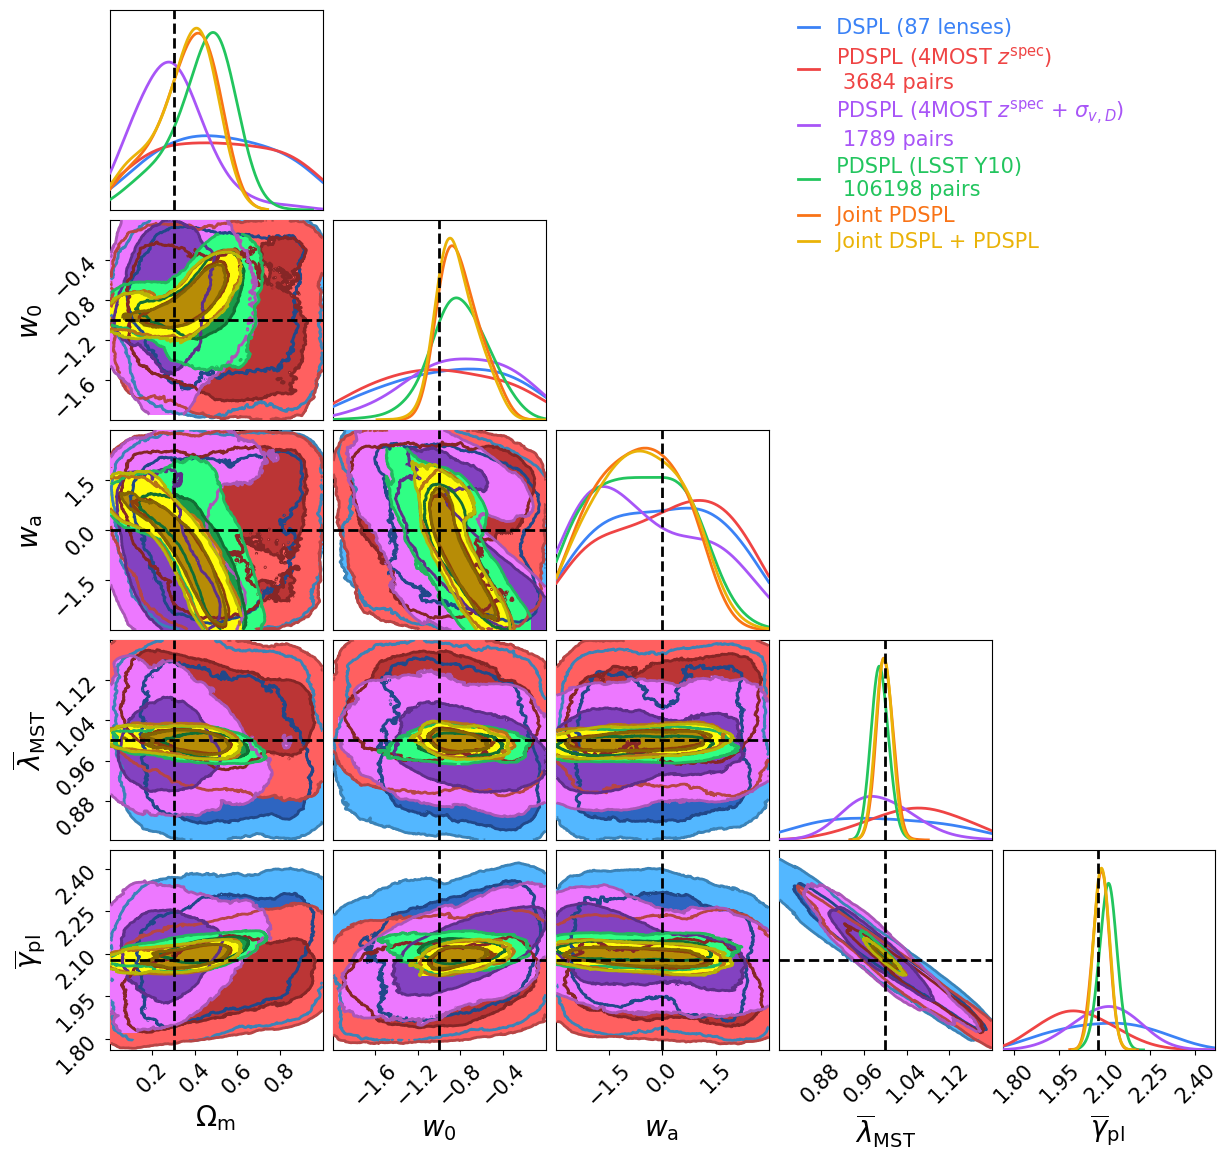

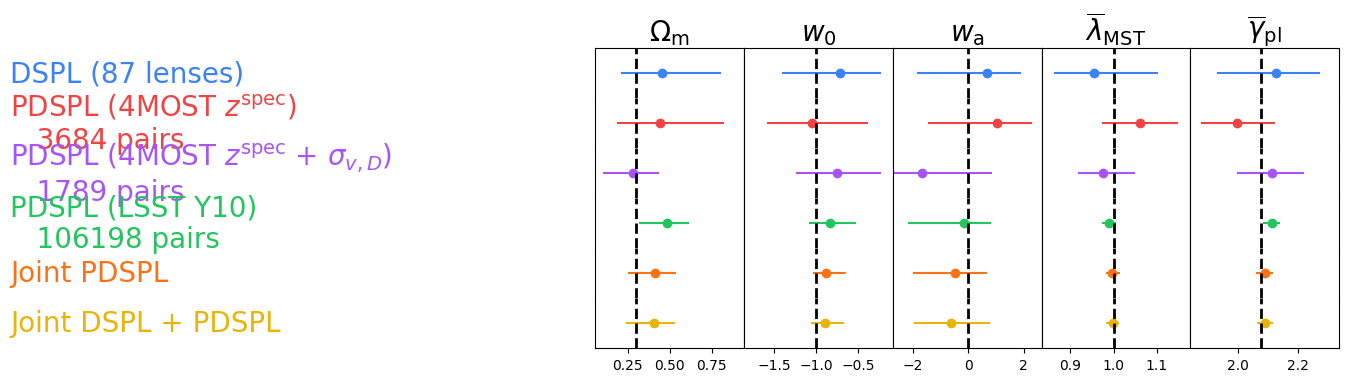

In [11]:
# plot the forecast results using chainconsumer

c = ChainConsumer()

for key in plotting_order_keys:
    c.add_chain(forecast_samples[key]["w0waCDM"]["chainconsumer_chain"])

c.add_truth(
    Truth(
    location = {
        r"$\Omega_{\rm m}$": 0.3,
        r"$w_0$": -1,
        r"$w_{\rm a}$": 0,
        r"$\overline{\lambda}_{\rm MST}$": 1.0,
        r"$\overline{\gamma}_{\rm pl}$": 2.078,
        # r"$\sigma(\gamma_{\rm pl, global})$": gamma_pl_sigma,
    }, line_width=2)
)

extents = {
                r"$\Omega_{\rm m}$": [0.1, 0.5],
                r"$w_0$": [-2, 0],
                r"$w_{\rm a}$": [-3, 3],
                r"$\overline{\lambda}_{\rm MST}$": [0.8, 1.2],
                r"$\overline{\gamma}_{\rm pl}$": [1.5, 2.5],
                # r"$\sigma(\gamma_{\rm pl, global})$": [0.0, 0.32],
            }

c.plotter.set_config(
    PlotConfig(
            # extents=extents,
            plot_hists=True,
            legend_kwargs={
                "loc": "upper left",
                "bbox_to_anchor": (-1, 1.),
                "fontsize": 15,
            },
            legend_artists=False,
            tick_font_size=15, 
            label_font_size=20,
        )
)

c.plotter.plot(
    filename = FIGURES_DIR + "forecast_w0waCDM.pdf",
);

# c.set_override(ChainConfig(statistics=SummaryStatistic.CUMULATIVE))

c.plotter.plot_summary(errorbar=True);
latex_table = c.analysis.get_latex_table()
print(latex_table)


### Prior on $\Omega_{\rm m}$

\begin{table}
    \centering
    \caption{}
    \label{tab:model_params}
    \begin{tabular}{cccccc}
        \hline
		Model & $\Omega_{\rm m}$ & $w_0$ & $w_{\rm a}$ & $\overline{\lambda}_{\rm MST}$ & $\overline{\gamma}_{\rm pl}$ \\ 
		\hline
		DSPL (87 lenses) + $\Omega_{\rm m}$ prior & $0.302\pm 0.053$ & $-1.21^{+0.59}_{-0.48}$ & $0.3^{+1.6}_{-1.9}$ & $0.977^{+0.084}_{-0.072}$ & $2.13\pm 0.13$ \\ 
		PDSPL (4MOST $z^{\rm spec}$) + $\Omega_{\rm m}$ prior & $0.302^{+0.055}_{-0.054}$ & $-1.02^{+0.55}_{-0.53}$ & $0.2^{+1.6}_{-1.9}$ & $1.037^{+0.097}_{-0.115}$ & $2.02^{+0.16}_{-0.13}$ \\ 
		PDSPL (4MOST $z^{\rm spec}$ + $\sigma_{v, D}$) + $\Omega_{\rm m}$ prior & $0.322\pm 0.050$ & $-1.31^{+0.57}_{-0.43}$ & $0.6^{+1.3}_{-1.6}$ & $1.000^{+0.097}_{-0.094}$ & $2.05\pm 0.13$ \\ 
		PDSPL (LSST Y10) + $\Omega_{\rm m}$ prior & $0.295^{+0.051}_{-0.052}$ & $-0.89\pm 0.17$ & $-0.27^{+0.76}_{-0.77}$ & $1.020^{+0.020}_{-0.019}$ & $2.051^{+0.033}_{-0.032}$ \\ 
		Joint PDSPL + $\Omega_{\rm m}$ prior & $0

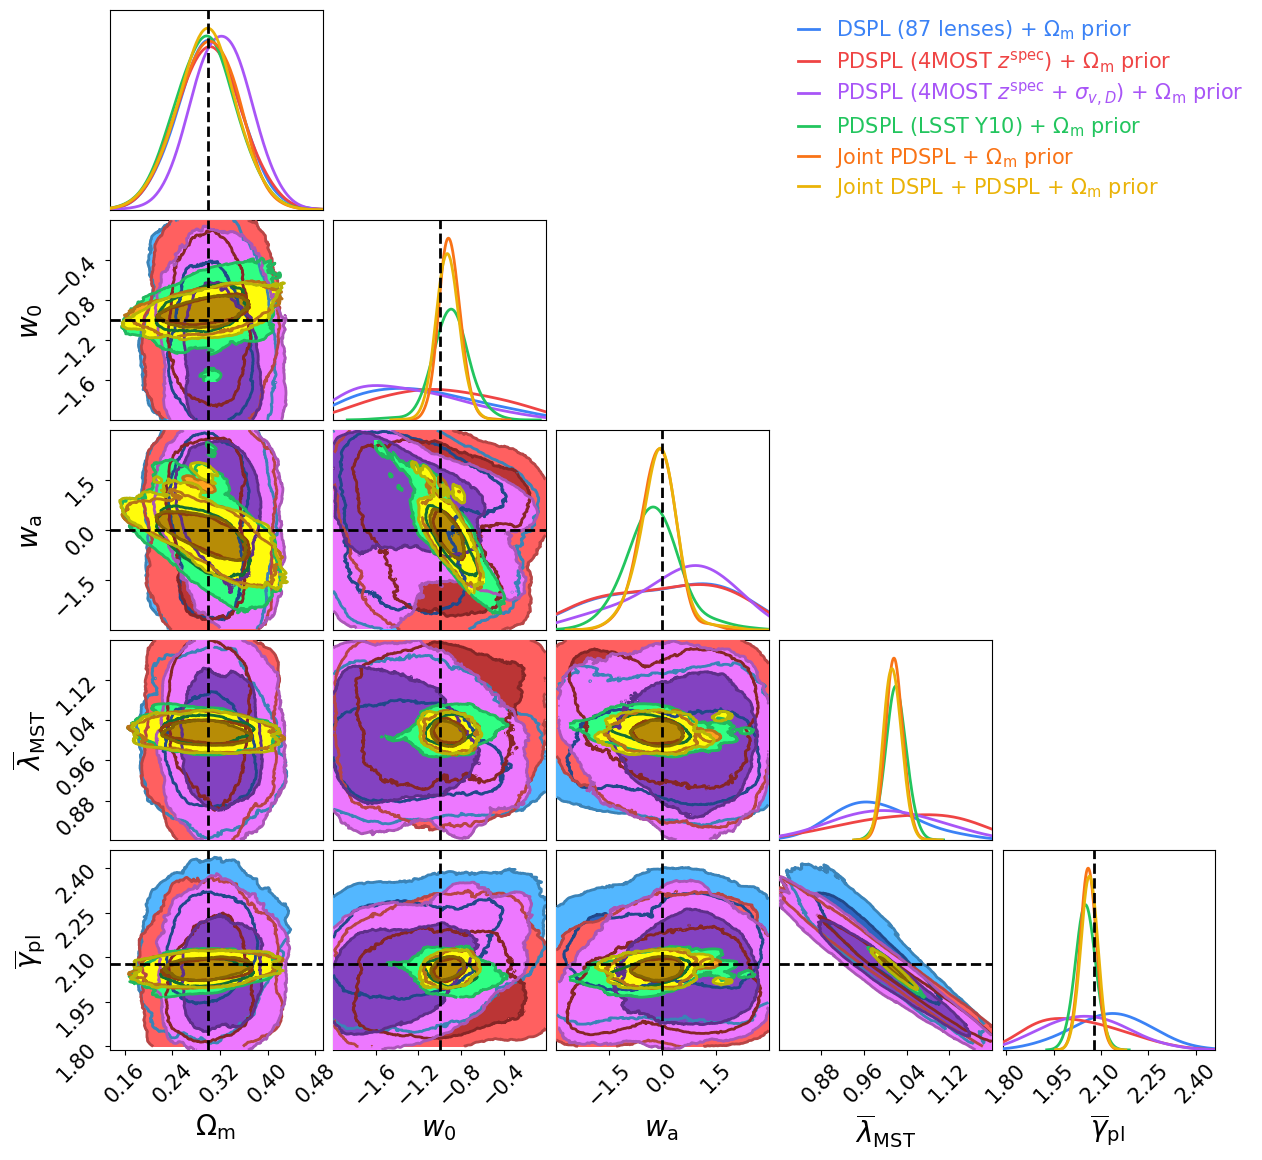

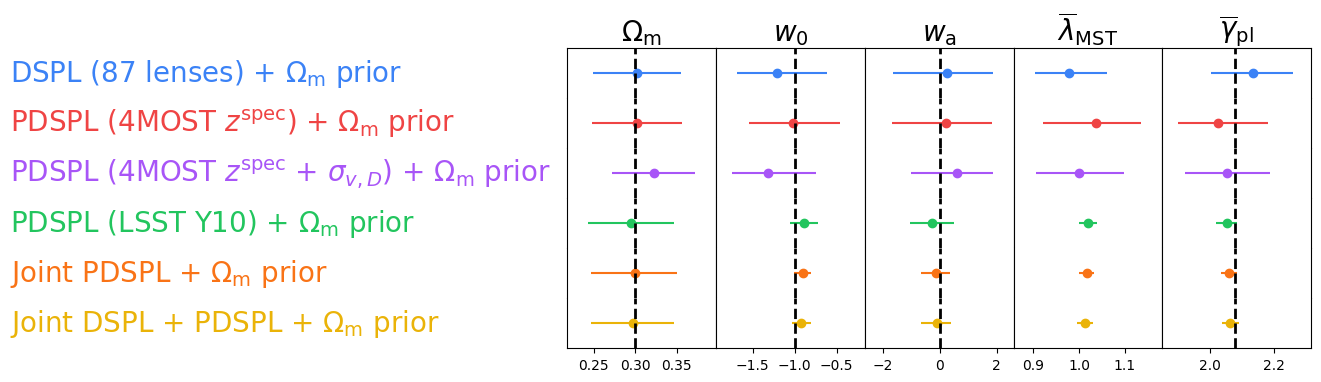

In [6]:
# plot the forecast results using chainconsumer

c = ChainConsumer()

for key in plotting_order_keys:
    c.add_chain(forecast_samples[key]["w0waCDM"]["chainconsumer_chain_with_prior"])

c.add_truth(
    Truth(
    location = {
        r"$\Omega_{\rm m}$": 0.3,
        r"$w_0$": -1,
        r"$w_{\rm a}$": 0,
        r"$\overline{\lambda}_{\rm int}$": 1.0,
        r"$\overline{\gamma}_{\rm pl}$": 2.078,
        # r"$\sigma(\gamma_{\rm pl, global})$": gamma_pl_sigma,
    }, line_width=2)
)

extents = {
                r"$\Omega_{\rm m}$": [0.1, 0.5],
                r"$w_0$": [-2, 0],
                r"$w_{\rm a}$": [-3, 3],
                r"$\overline{\lambda}_{\rm int}$": [0.8, 1.2],
                r"$\overline{\gamma}_{\rm pl}$": [1.5, 2.5],
                # r"$\sigma(\gamma_{\rm pl, global})$": [0.0, 0.32],
            }

c.plotter.set_config(
    PlotConfig(
            # extents=extents,
            plot_hists=True,
            legend_kwargs={
                "loc": "upper left",
                "bbox_to_anchor": (-1, 1.),
                "fontsize": 15,
            },
            legend_artists=False,
            tick_font_size=15,
            label_font_size=20,
        )
)

c.plotter.plot(
    filename = FIGURES_DIR + "forecast_w0waCDM_with_prior.pdf",
);

c.set_override(ChainConfig(statistics=SummaryStatistic.CUMULATIVE))

c.plotter.plot_summary(errorbar=True);
latex_table = c.analysis.get_latex_table()
print(latex_table)

\begin{table}
    \centering
    \caption{}
    \label{tab:model_params}
    \begin{tabular}{cccccc}
        \hline
		Model & $\Omega_{\rm m}$ & $w_0$ & $w_{\rm a}$ & $\overline{\lambda}_{\rm MST}$ & $\overline{\gamma}_{\rm pl}$ \\ 
		\hline
		DSPL (87 lenses) + $\Omega_{\rm m}$ prior & $0.301^{+0.054}_{-0.053}$ & $-1.36^{+0.59}_{-0.50}$ & $1.1^{+1.1}_{-2.6}$ & $0.963^{+0.088}_{-0.070}$ & $2.14\pm 0.13$ \\ 
		PDSPL (4MOST $z^{\rm spec}$) + $\Omega_{\rm m}$ prior & $0.303^{+0.052}_{-0.057}$ & $-1.07^{+0.61}_{-0.52}$ & $1.0^{+1.1}_{-2.6}$ & $1.077^{+0.085}_{-0.131}$ & $1.97^{+0.18}_{-0.11}$ \\ 
		PDSPL (4MOST $z^{\rm spec}$ + $\sigma_{v, D}$) + $\Omega_{\rm m}$ prior & $0.322^{+0.049}_{-0.051}$ & $-1.59^{+0.65}_{-0.34}$ & $0.9^{+1.3}_{-1.6}$ & $0.996^{+0.102}_{-0.095}$ & $2.05^{+0.13}_{-0.14}$ \\ 
		PDSPL (LSST Y10) + $\Omega_{\rm m}$ prior & $0.298^{+0.049}_{-0.055}$ & $-0.89\pm 0.17$ & $-0.26^{+0.74}_{-0.79}$ & $1.019^{+0.020}_{-0.019}$ & $2.051\pm 0.033$ \\ 
		Joint PDSPL + $\Omega_{\

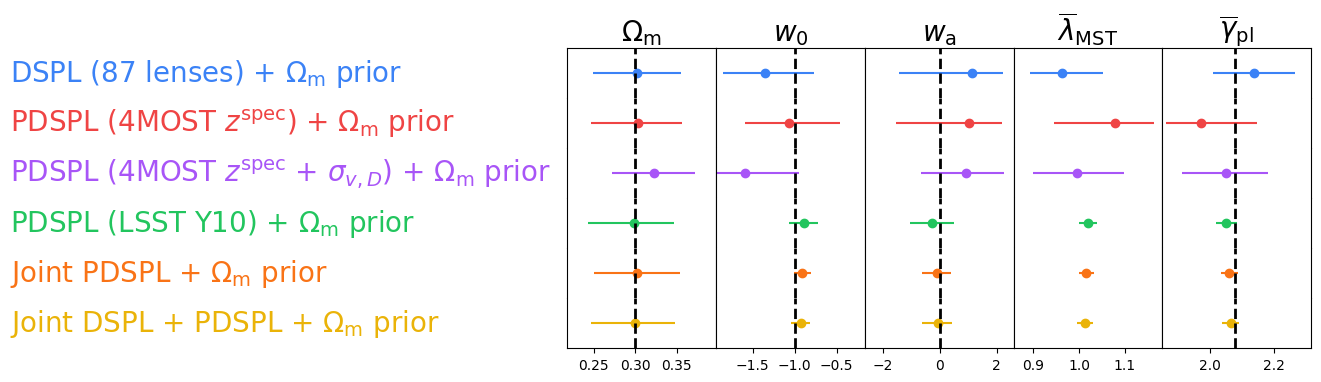

In [7]:
c.set_override(ChainConfig(statistics=SummaryStatistic.MAX))

c.plotter.plot_summary(errorbar=True);
latex_table = c.analysis.get_latex_table()
print(latex_table)

### All Paper Forecast Figures

In [8]:
# update the name with number of pairs for PDSPL cases
for sample_key in ["lsst_y10", "lsst_4most_spec-z", "lsst_4most_spec-z_sigma_v"]:
    num_pairs = forecast_samples[sample_key]['num_pairs']

    # update the name in the chainconsumer chain as well
    forecast_samples[sample_key]['w0waCDM']['chainconsumer_chain'].name += f"\n   {num_pairs} pairs"
    forecast_samples[sample_key]['w0waCDM']['chainconsumer_chain_with_prior'].name += f"\n   {num_pairs} pairs"

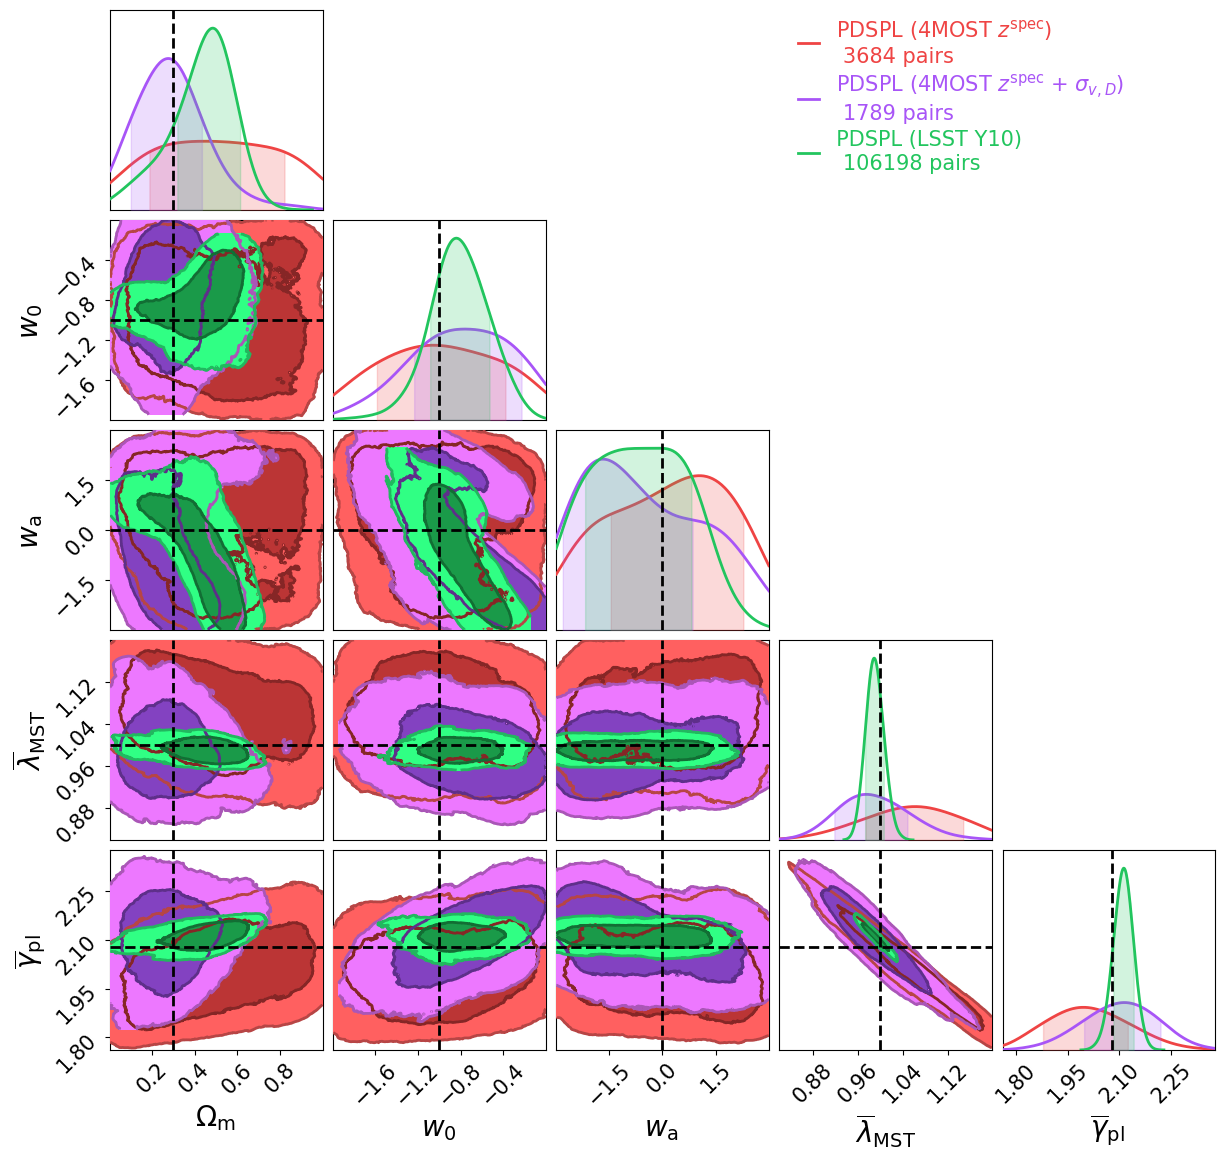

In [9]:
# All PDSPLs compared

c = ChainConsumer()

for key in ["lsst_4most_spec-z", "lsst_4most_spec-z_sigma_v", "lsst_y10"]:
    c.add_chain(forecast_samples[key]["w0waCDM"]["chainconsumer_chain"])

c.add_truth(
    Truth(
    location = {
        r"$\Omega_{\rm m}$": 0.3,
        r"$w_0$": -1,
        r"$w_{\rm a}$": 0,
        r"$\overline{\lambda}_{\rm MST}$": 1.0,
        r"$\overline{\gamma}_{\rm pl}$": 2.078,
        # r"$\sigma(\gamma_{\rm pl, global})$": gamma_pl_sigma,
    }, line_width=2)
)

extents = {
                r"$\Omega_{\rm m}$": [0.1, 0.5],
                r"$w_0$": [-2, 0],
                r"$w_{\rm a}$": [-3, 3],
                r"$\overline{\lambda}_{\rm MST}$": [0.8, 1.2],
                r"$\overline{\gamma}_{\rm pl}$": [1.5, 2.5],
                # r"$\sigma(\gamma_{\rm pl, global})$": [0.0, 0.32],
            }   

c.plotter.set_config(
    PlotConfig(
            # extents=extents,
            plot_hists=True,
            legend_kwargs={
                "loc": "upper left",
                "bbox_to_anchor": (-1, 1.),
                "fontsize": 15,
            },
            legend_artists=False,
            tick_font_size=15,
            label_font_size=20,
        )
)

c.plotter.plot(
    filename = FIGURES_DIR + "forecast_w0waCDM_all_PDSPLs.pdf",
);

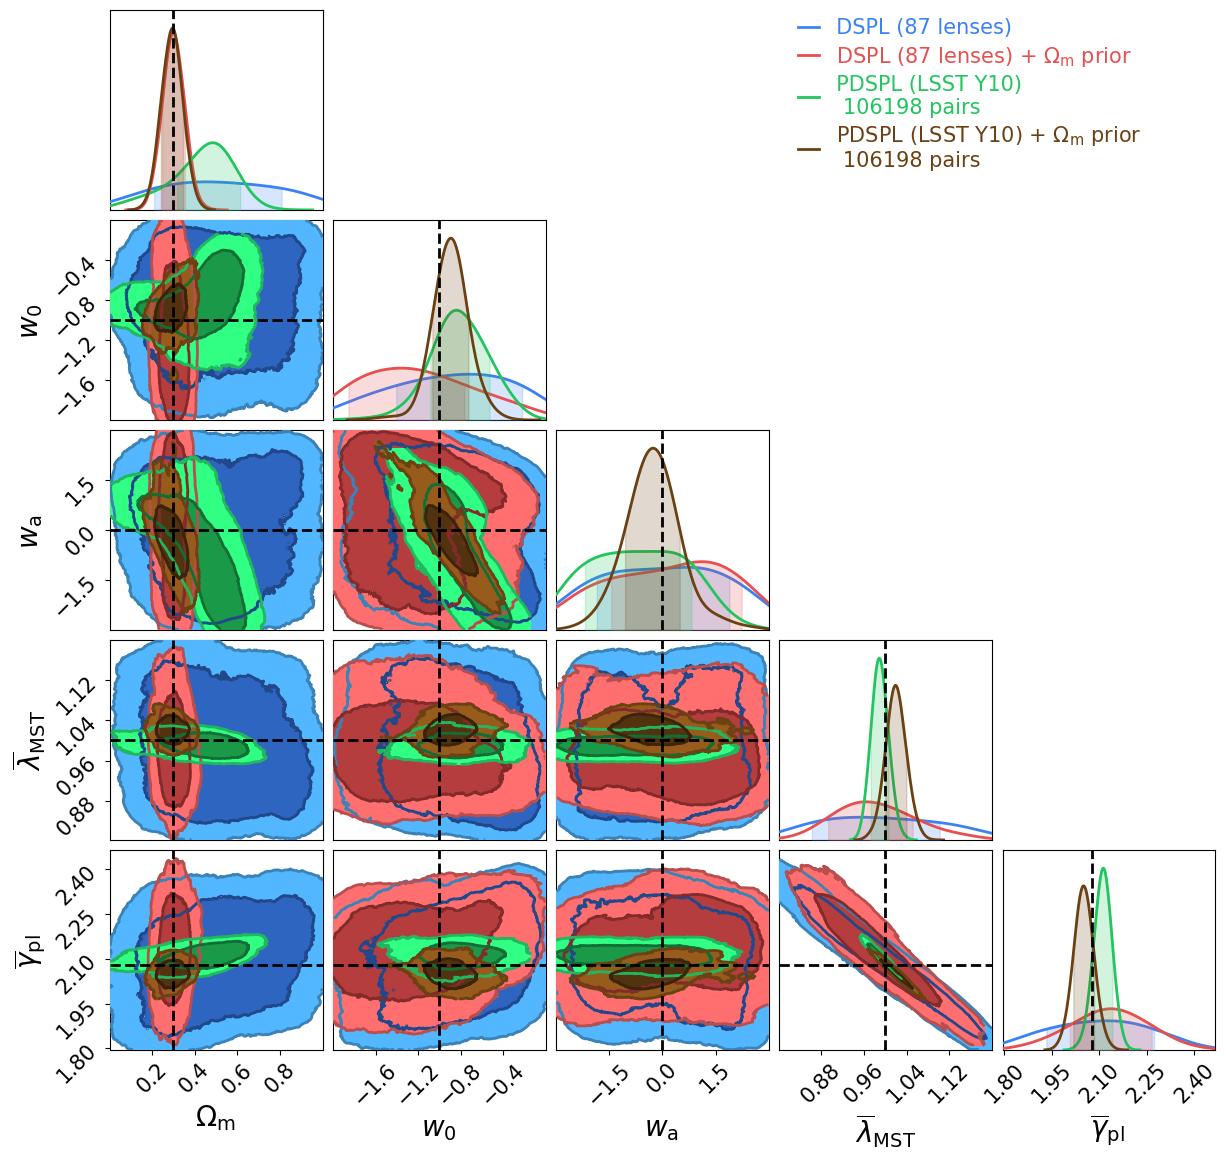

In [10]:
# All PDSPLs compared

c = ChainConsumer()

c.add_chain(forecast_samples["DSPL"]["w0waCDM"]["chainconsumer_chain"])

# add DSPL with prior
# change color
DSPL_chain_with_prior = copy.deepcopy(forecast_samples["DSPL"]['w0waCDM']['chainconsumer_chain_with_prior'])
DSPL_chain_with_prior.color = "#e84f4f"
c.add_chain(DSPL_chain_with_prior)

c.add_chain(forecast_samples["lsst_y10"]["w0waCDM"]["chainconsumer_chain"])

# add lsst_y10 with prior
# change color
lsst_y10_chain_with_prior = copy.deepcopy(forecast_samples["lsst_y10"]['w0waCDM']['chainconsumer_chain_with_prior'])
lsst_y10_chain_with_prior.color = '#6b4114'
c.add_chain(lsst_y10_chain_with_prior)

c.add_truth(
    Truth(
    location = {
        r"$\Omega_{\rm m}$": 0.3,
        r"$w_0$": -1,
        r"$w_{\rm a}$": 0,
        r"$\overline{\lambda}_{\rm MST}$": 1.0,
        r"$\overline{\gamma}_{\rm pl}$": 2.078,
        # r"$\sigma(\gamma_{\rm pl, global})$": gamma_pl_sigma,
    }, line_width=2)
)

extents = {
                r"$\Omega_{\rm m}$": [0.1, 0.5],
                r"$w_0$": [-2, 0],
                r"$w_{\rm a}$": [-3, 3],
                r"$\overline{\lambda}_{\rm MST}$": [0.8, 1.2],
                r"$\overline{\gamma}_{\rm pl}$": [1.5, 2.5],
                # r"$\sigma(\gamma_{\rm pl, global})$": [0.0, 0.32],
            }   

c.plotter.set_config(
    PlotConfig(
            # extents=extents,
            plot_hists=True,
            legend_kwargs={
                "loc": "upper left",
                "bbox_to_anchor": (-1, 1.),
                "fontsize": 15,
            },
            legend_artists=False,
            tick_font_size=15,
            label_font_size=20,
        )
)

c.plotter.plot(
    filename = FIGURES_DIR + "forecast_w0waCDM_DSPL_PDSPL_y10.pdf",
);

In [ ]:
latex_table = c.analysis.get_latex_table()
print(latex_table)

Parameter $w_0$ in chain DSPL (87 lenses) + $\Omega_{\rm m}$ prior is not constrained
Parameter $\overline{\gamma}_{\rm pl}$ in chain DSPL (87 lenses) + $\Omega_{\rm m}$ prior is not constrained


\begin{table}
    \centering
    \caption{}
    \label{tab:model_params}
    \begin{tabular}{cccccc}
        \hline
		Model & $\Omega_{\rm m}$ & $w_0$ & $w_{\rm a}$ & $\overline{\lambda}_{\rm MST}$ & $\overline{\gamma}_{\rm pl}$ \\ 
		\hline
		DSPL (87 lenses) & $0.43^{+0.37}_{-0.24}$ & $-0.65^{+0.48}_{-0.70}$ & $1.10^{+0.74}_{-3.04}$ & $0.934^{+0.161}_{-0.077}$ & $2.17^{+0.10}_{-0.23}$ \\ 
		DSPL (87 lenses) + $\Omega_{\rm m}$ prior & $0.304^{+0.040}_{-0.057}$ &  & $0.96^{+0.70}_{-2.92}$ & $1.02^{+0.10}_{-0.15}$ &  \\ 
		PDSPL (LSST Y10)
   106198 pairs & $0.49^{+0.11}_{-0.16}$ & $-0.87^{+0.32}_{-0.19}$ & $0.62^{+0.33}_{-2.63}$ & $0.989^{+0.016}_{-0.015}$ & $2.113^{+0.026}_{-0.029}$ \\ 
		PDSPL (LSST Y10) + $\Omega_{\rm m}$ prior
   106198 pairs & $0.323^{+0.045}_{-0.058}$ & $-0.91^{+0.15}_{-0.17}$ & $0.46^{+0.65}_{-0.77}$ & $0.997^{+0.013}_{-0.020}$ & $2.097^{+0.032}_{-0.026}$ \\ 
		\hline
    \end{tabular}
\end{table}


### Poster Forecast Figures

In [ ]:
# All PDSPLs compared

c = ChainConsumer()

c.add_chain(forecast_samples["DSPL"]["w0waCDM"]["chainconsumer_chain"])

# add DSPL with prior
# change color
DSPL_chain_with_prior = copy.deepcopy(forecast_samples["DSPL"]['w0waCDM']['chainconsumer_chain_with_prior'])
DSPL_chain_with_prior.color = "#e84f4f"
c.add_chain(DSPL_chain_with_prior)

c.add_chain(forecast_samples["lsst_y10"]["w0waCDM"]["chainconsumer_chain"])

# add lsst_y10 with prior
# change color
lsst_y10_chain_with_prior = copy.deepcopy(forecast_samples["lsst_y10"]['w0waCDM']['chainconsumer_chain_with_prior'])
lsst_y10_chain_with_prior.color = '#6b4114'
c.add_chain(lsst_y10_chain_with_prior)


c.add_truth(
    Truth(
    location = {
        r"$\Omega_{\rm m}$": 0.3,
        r"$w_0$": -1,
        r"$w_{\rm a}$": 0,
        r"$\overline{\lambda}_{\rm MST}$": 1.0,
        r"$\overline{\gamma}_{\rm pl}$": 2.078,
        # r"$\sigma(\gamma_{\rm pl, global})$": gamma_pl_sigma,
    }, line_width=2)
)

extents = {
                r"$\Omega_{\rm m}$": [0.1, 0.5],
                r"$w_0$": [-2, 0],
                r"$w_{\rm a}$": [-3, 3],
                r"$\overline{\lambda}_{\rm MST}$": [0.8, 1.2],
                r"$\overline{\gamma}_{\rm pl}$": [1.5, 2.5],
                # r"$\sigma(\gamma_{\rm pl, global})$": [0.0, 0.32],
            }   

c.plotter.set_config(
    PlotConfig(
            # extents=extents,
            plot_hists=True,
            legend_kwargs={
                "loc": "upper left",
                "bbox_to_anchor": (-1, 1.),
                "fontsize": 15,
            },
            legend_artists=False,
            tick_font_size=15,
            label_font_size=20,
        )
)

c.plotter.plot(
    filename = FIGURES_DIR + "forecast_w0waCDM_poster.pdf",
);

## Figures for $w$-CDM cosmology forecast 

In [ ]:
# load posterior samples
columns=[
            '$\\Omega_{\\rm m}$',
            '$w$',
            '$\\overline{\\lambda}_{\\rm int}$',
            '$\\overline{\\gamma}_{\\rm pl}$',
            ]


for key in forecast_samples.keys():
    forecast_samples[key]["wCDM"]["emcee_backend"] = emcee.backends.HDFBackend(
        POSTERIOR_DIR + f"{key}_wCDM.h5", read_only=True
    )
    samples = forecast_samples[key]["wCDM"]["emcee_backend"].get_chain(flat = True,
                                                                  discard=500,
                                                                  thin=100)
    forecast_samples[key]["emcee_samples"] = samples

    df = DataFrame(samples, columns=columns)
    forecast_samples[key]["wCDM"]["chainconsumer_chain"] = Chain(
        samples=df, name=forecast_samples[key]["name"], 
        color=forecast_samples[key]["color"],
        kde=1.5, 
        shade=True,
        shade_alpha=1.0,
        linewidth=2,
    )

\begin{table}
    \centering
    \caption{}
    \label{tab:model_params}
    \begin{tabular}{ccccc}
        \hline
		Model & $\Omega_{\rm m}$ & $w$ & $\overline{\lambda}_{\rm int}$ & $\overline{\gamma}_{\rm pl}$ \\ 
		\hline
		DSPL (87 lenses) & $0.62^{+0.28}_{-0.33}$ & $-0.71^{+0.52}_{-0.72}$ & $0.877^{+0.101}_{-0.076}$ & $2.26^{+0.13}_{-0.16}$ \\ 
		PDSPL (4MOST $z^{\rm spec}$) & $0.17^{+0.33}_{-0.17}$ & $-1.41^{+0.58}_{-0.47}$ & $0.940^{+0.100}_{-0.091}$ & $2.16^{+0.15}_{-0.16}$ \\ 
		PDSPL (4MOST $z^{\rm spec}$ + $\sigma_{v, D}$) & $0.24^{+0.12}_{-0.14}$ & $-1.08^{+0.29}_{-0.36}$ & $0.880^{+0.066}_{-0.057}$ & $2.209^{+0.096}_{-0.104}$ \\ 
		PDSPL (LSST Y10) & $0.355^{+0.097}_{-0.090}$ & $-1.01^{+0.15}_{-0.16}$ & $0.985\pm 0.019$ & $2.111^{+0.036}_{-0.035}$ \\ 
		\hline
    \end{tabular}
\end{table}


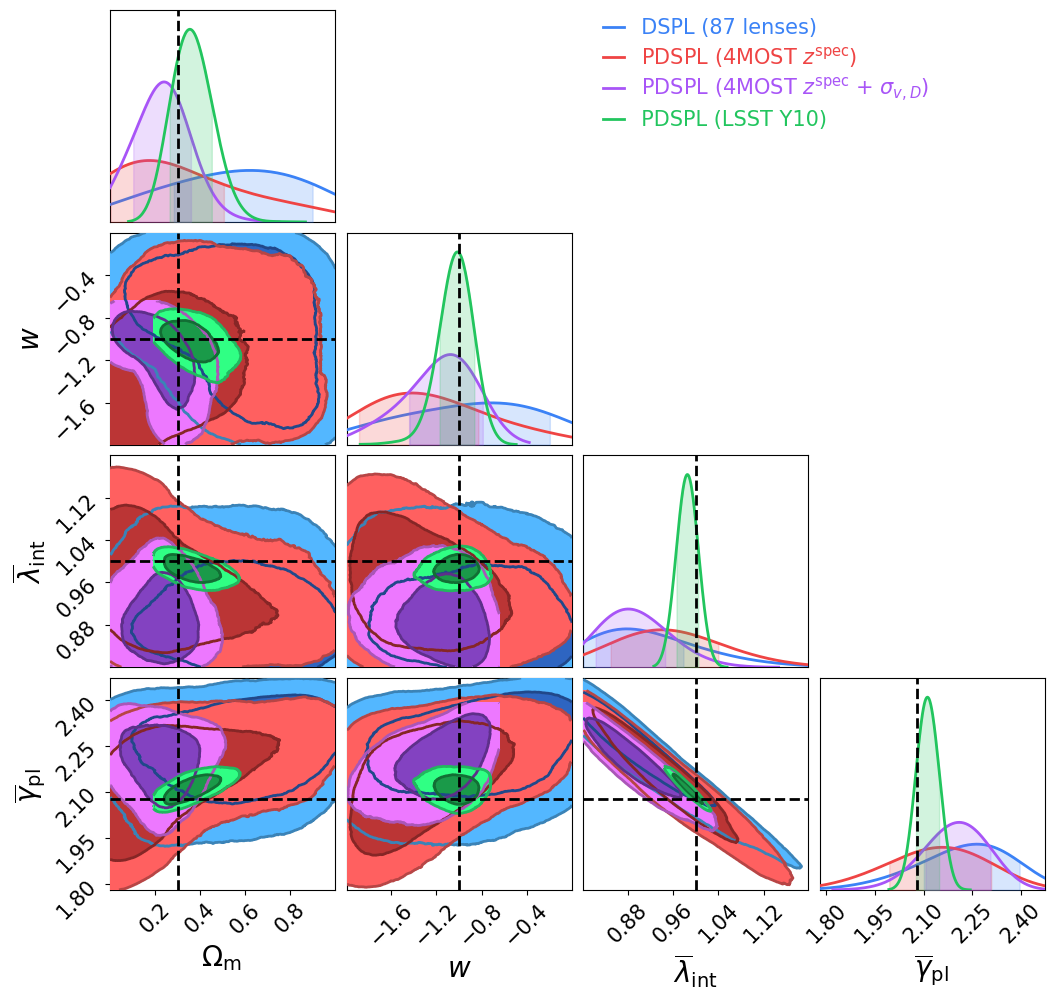

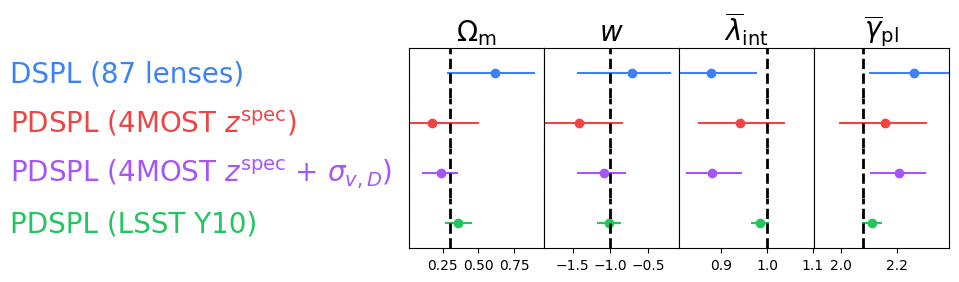

In [ ]:
# plot the forecast results using chainconsumer

c = ChainConsumer()

for key in plotting_order_keys:
    c.add_chain(forecast_samples[key]["wCDM"]["chainconsumer_chain"])

c.add_truth(
    Truth(
    location = {
        r"$\Omega_{\rm m}$": 0.3,
        r"$w$": -1,
        r"$\overline{\lambda}_{\rm int}$": 1.0,
        r"$\overline{\gamma}_{\rm pl}$": 2.078,
        # r"$\sigma(\gamma_{\rm pl, global})$": gamma_pl_sigma,
    }, line_width=2)
)

extents = {
                r"$\Omega_{\rm m}$": [0.1, 0.5],
                r"$w$": [-2, 0],
                r"$\overline{\lambda}_{\rm int}$": [0.8, 1.2],
                r"$\overline{\gamma}_{\rm pl}$": [1.5, 2.5],
                # r"$\sigma(\gamma_{\rm pl, global})$": [0.0, 0.32],
            }

c.plotter.set_config(
    PlotConfig(
            # extents=extents,
            plot_hists=True,
            legend_kwargs={
                "loc": "upper left",
                "bbox_to_anchor": (-1, 1.),
                "fontsize": 15,
            },
            legend_artists=False,
            tick_font_size=15, 
            label_font_size=20,
        )
)

c.plotter.plot(
    filename = FIGURES_DIR + "forecast_wCDM.pdf",
);


c.plotter.plot_summary(errorbar=True);
latex_table = c.analysis.get_latex_table()
print(latex_table)

### Prior on $\Omega_{\rm m}$

In [ ]:
# external priors

# sigma_lambda_prior = 0.01
# sigma_gamma_prior = 0.01
sigma_omega_m_prior = 0.05
# sigma_wa_prior = 0.4

om_true = 0.3
w_true = -1


#flat_samples = sampler.get_chain(discard=n_burn, thin=1, flat=True)

#print(joint_chain.samples[r"$\overline{\lambda}_{\rm int}$"])

def add_prior_to_chain(chain):
    chain_weights = copy.deepcopy(chain)
    # lambda_int = chain.samples[r"$\overline{\lambda}_{\rm int}$"]
    om = chain.samples[r"$\Omega_{\rm m}$"]
    # gamma_pl = chain.samples[r"$\overline{\gamma}_{\rm pl}$"]
    # wa = chain.samples[r"$w_{\rm a}$"]
    weights_om = -(om - om_true)**2 / (2*sigma_omega_m_prior**2)
    # weights_lambda = -(lambda_int - lambda_mst_mean)**2 / (2*sigma_lambda_prior**2)
    # weights_gamma = -(gamma_pl - gamma_pl_mean)**2 / (2*sigma_gamma_prior**2)
    # weights_wa = -(wa - wa_true)**2 / (2*sigma_wa_prior**2)
    # weights = np.exp(weights_gamma + weights_lambda + weights_om + weights_wa)
    weights = np.exp(weights_om)
    weights[weights < 10**(-10)] = 10**(-10)
    chain_weights.samples["weight"] = weights
    chain_weights.name = chain.name+" + $\\Omega_{\\rm m}$ prior"
    return chain_weights

In [ ]:
for key in forecast_samples.keys():
    chain = forecast_samples[key]['wCDM']['chainconsumer_chain']
    chain_with_prior = add_prior_to_chain(chain)
    forecast_samples[key]['wCDM']['chainconsumer_chain_with_prior'] = chain_with_prior

\begin{table}
    \centering
    \caption{}
    \label{tab:model_params}
    \begin{tabular}{ccccc}
        \hline
		Model & $\Omega_{\rm m}$ & $w$ & $\overline{\lambda}_{\rm int}$ & $\overline{\gamma}_{\rm pl}$ \\ 
		\hline
		DSPL (87 lenses) + $\Omega_{\rm m}$ prior & $0.312^{+0.059}_{-0.069}$ & $-0.63^{+0.50}_{-0.62}$ & $0.897^{+0.106}_{-0.089}$ & $2.23^{+0.14}_{-0.17}$ \\ 
		PDSPL (4MOST $z^{\rm spec}$) + $\Omega_{\rm m}$ prior & $0.288^{+0.066}_{-0.059}$ & $-1.25^{+0.56}_{-0.51}$ & $0.935^{+0.083}_{-0.081}$ & $2.16\pm 0.12$ \\ 
		PDSPL (4MOST $z^{\rm spec}$ + $\sigma_{v, D}$) + $\Omega_{\rm m}$ prior & $0.284^{+0.053}_{-0.052}$ & $-1.23^{+0.31}_{-0.36}$ & $0.883^{+0.066}_{-0.056}$ & $2.193^{+0.091}_{-0.097}$ \\ 
		PDSPL (LSST Y10) + $\Omega_{\rm m}$ prior & $0.316\pm 0.050$ & $-0.99\pm 0.12$ & $0.990\pm 0.018$ & $2.098^{+0.031}_{-0.030}$ \\ 
		\hline
    \end{tabular}
\end{table}


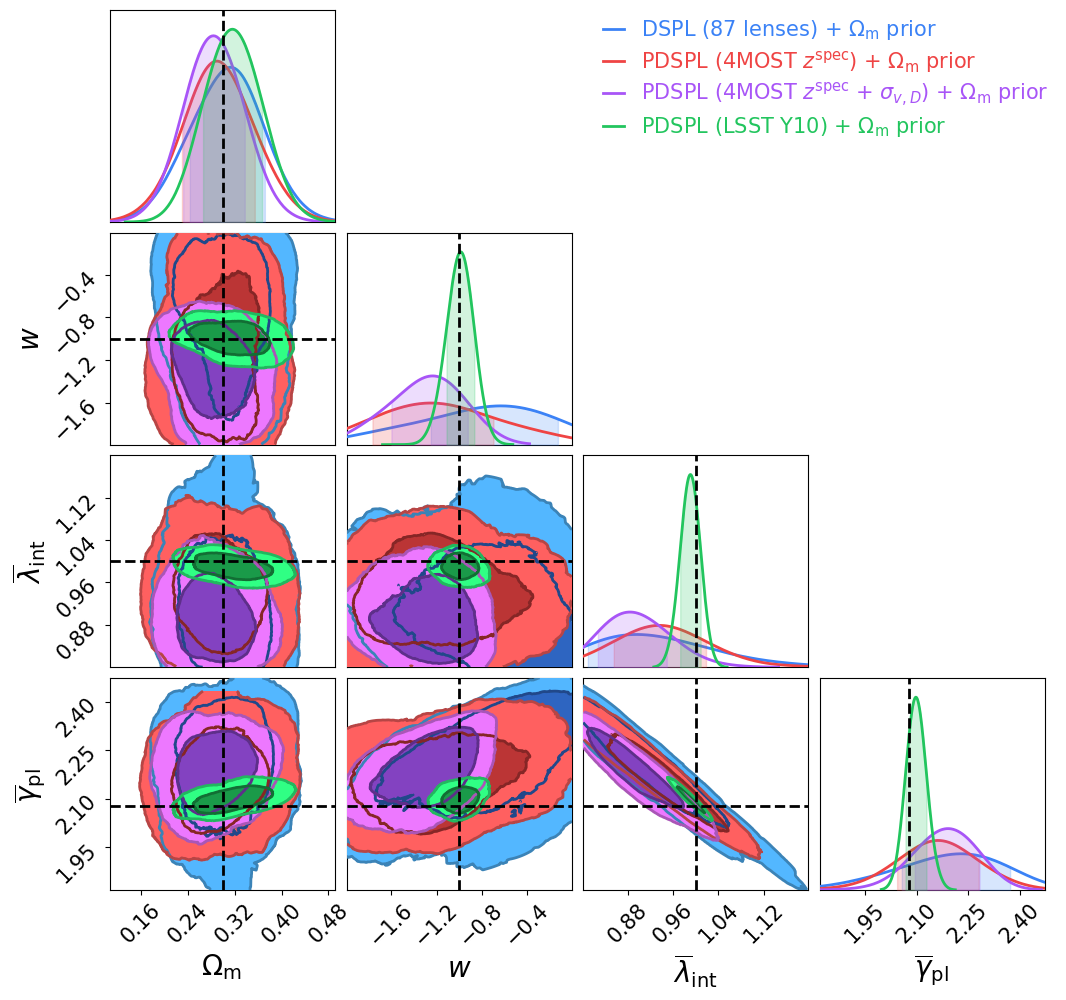

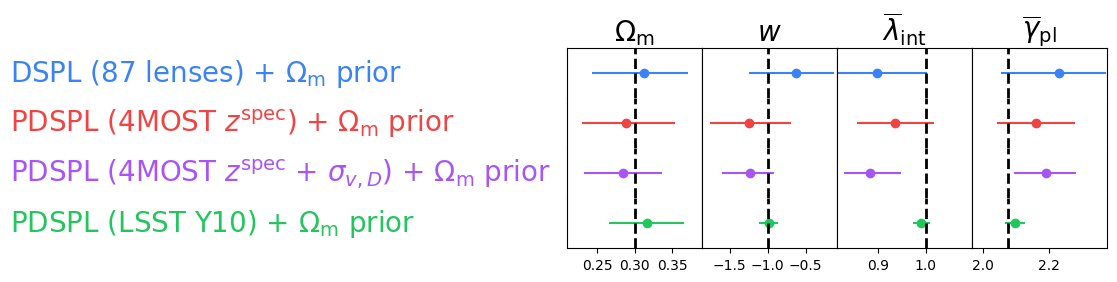

In [ ]:
# plot the forecast results using chainconsumer

c = ChainConsumer()

for key in plotting_order_keys:
    c.add_chain(forecast_samples[key]['wCDM']['chainconsumer_chain_with_prior'])

c.add_truth(
    Truth(
    location = {
        r"$\Omega_{\rm m}$": 0.3,
        r"$w$": -1,
        r"$\overline{\lambda}_{\rm int}$": 1.0,
        r"$\overline{\gamma}_{\rm pl}$": 2.078,
        # r"$\sigma(\gamma_{\rm pl, global})$": gamma_pl_sigma,
    }, line_width=2)
)

extents = {
                r"$\Omega_{\rm m}$": [0.1, 0.5],
                r"$w$": [-2, 0],
                r"$\overline{\lambda}_{\rm int}$": [0.8, 1.2],
                r"$\overline{\gamma}_{\rm pl}$": [1.5, 2.5],
                # r"$\sigma(\gamma_{\rm pl, global})$": [0.0, 0.32],
            }

c.plotter.set_config(
    PlotConfig(
            # extents=extents,
            plot_hists=True,
            legend_kwargs={
                "loc": "upper left",
                "bbox_to_anchor": (-1, 1.),
                "fontsize": 15,
            },
            legend_artists=False,
            tick_font_size=15,
            label_font_size=20,
        )
)

c.plotter.plot(
    filename = FIGURES_DIR + "forecast_wCDM_with_prior.pdf",
);

c.plotter.plot_summary(errorbar=True);
latex_table = c.analysis.get_latex_table()
print(latex_table)